In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb


In [80]:
Data = pd.read_csv('Top23.csv')
Data.reset_index(drop=True, inplace=True)
Data=pd.DataFrame(Data)
datetime_series = pd.to_datetime(Data['Date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
Data=Data.set_index(datetime_index)
Data.drop('Date',axis=1,inplace=True)
Data.head()

,PFGDAAU LX Equity,PFTEAAU LX Equity,PFCSAAU LX Equity,PFARAAU LX Equity,PFBKAAU LX Equity,PFGOAAU LX Equity,AIBALMA AB Equity,LODFUIA LX Equity,CCASORI MK Equity,CCASLTF MK Equity,...,GMFDEBI LE Equity,PGPGIFA ID Equity,BLUESPH BM Equity,PFGLAAU LX Equity,ALPCRDA LX Equity,ALCONGP AB Equity,UBSFLBI LX Equity,BUTIBLI KY Equity,PGPCBFA ID Equity,SCHGTRA LX Equity
2020-01-05,125.93,132.19,126.97,144.87,102.16,116.12,16.6996,112.33,2.5811,3.3174,...,107.58,1.203,1087.01,114.97,116.80,1.5310,146.87,30.00,1.804,108.6293
2020-01-17,127.36,134.08,130.35,150.74,105.57,122.95,17.8299,113.34,2.5511,3.2784,...,107.90,1.245,1109.94,119.10,126.55,1.5898,146.98,31.95,1.936,113.7443
2020-01-24,127.36,134.08,130.35,150.74,105.57,122.95,17.8168,113.34,2.5484,3.2766,...,107.90,1.245,1109.94,119.10,126.91,1.5879,146.93,32.28,1.865,113.6851
2020-01-31,128.51,135.13,131.34,152.17,106.59,124.81,17.6950,113.66,2.5424,3.2758,...,108.09,1.246,1114.02,119.35,126.97,1.5753,146.91,31.98,1.857,112.6737
2020-02-10,134.85,139.35,133.97,156.04,109.34,126.30,18.8113,113.03,2.6935,3.4563,...,108.22,1.241,1119.46,121.95,126.94,1.5832,149.48,32.92,2.144,115.9955


In [29]:
# Log of percentage change of all stocks in the list
Ret= Data.pct_change().apply(lambda x: np.log(1+x)) # CONVERT TO RETURN
Ret.head()

,PFGDAAU LX Equity,PFTEAAU LX Equity,PFCSAAU LX Equity,PFARAAU LX Equity,PFBKAAU LX Equity,PFGOAAU LX Equity,AIBALMA AB Equity,LODFUIA LX Equity,CCASORI MK Equity,CCASLTF MK Equity,...,GMFDEBI LE Equity,PGPGIFA ID Equity,BLUESPH BM Equity,PFGLAAU LX Equity,ALPCRDA LX Equity,ALCONGP AB Equity,UBSFLBI LX Equity,BUTIBLI KY Equity,PGPCBFA ID Equity,SCHGTRA LX Equity
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-17,0.011292,0.014196,0.026272,0.039720,0.032834,0.057154,0.065492,0.008951,-0.011691,-0.011826,...,0.002970,0.034317,0.020875,0.035292,0.080174,0.037687,0.000749,0.062975,0.070618,0.046012
2020-01-24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000735,0.000000,-0.001059,-0.000549,...,0.000000,0.000000,0.000000,0.000000,0.002841,-0.001196,-0.000340,0.010276,-0.037363,-0.000521
2020-01-31,0.008989,0.007801,0.007566,0.009442,0.009615,0.015015,-0.006860,0.002819,-0.002357,-0.000244,...,0.001759,0.000803,0.003669,0.002097,0.000473,-0.007967,-0.000136,-0.009337,-0.004299,-0.008936
2020-02-10,0.048156,0.030751,0.019827,0.025114,0.025473,0.011867,0.061176,-0.005558,0.057733,0.053637,...,0.001202,-0.004021,0.004871,0.021551,-0.000236,0.005002,0.017342,0.028970,0.143711,0.029055


In [30]:
Ann_Ret = Ret.mean()*52
print (Ann_Ret)

PFGDAAU LX Equity    0.193103
PFTEAAU LX Equity    0.148640
PFCSAAU LX Equity    0.142347
PFARAAU LX Equity    0.137116
PFBKAAU LX Equity    0.129976
PFGOAAU LX Equity    0.128215
AIBALMA AB Equity    0.156728
LODFUIA LX Equity    0.019267
CCASORI MK Equity    0.073103
CCASLTF MK Equity    0.071160
BBFTOP3 KY Equity    0.055968
CRLCBUU LX Equity    0.045205
BCUSDLF KK Equity    0.006239
GMFDEBI LE Equity    0.011142
PGPGIFA ID Equity    0.057633
BLUESPH BM Equity    0.048089
PFGLAAU LX Equity    0.082974
ALPCRDA LX Equity    0.085297
ALCONGP AB Equity    0.049993
UBSFLBI LX Equity    0.019595
BUTIBLI KY Equity    0.128367
PGPCBFA ID Equity    0.169876
SCHGTRA LX Equity    0.086125
dtype: float64


In [31]:
Ann_Risk=Data.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(52))

print(Ann_Risk)

PFGDAAU LX Equity    0.461536
PFTEAAU LX Equity    0.351670
PFCSAAU LX Equity    0.344130
PFARAAU LX Equity    0.300020
PFBKAAU LX Equity    0.319491
PFGOAAU LX Equity    0.206006
AIBALMA AB Equity    0.358585
LODFUIA LX Equity    0.047346
CCASORI MK Equity    0.149778
CCASLTF MK Equity    0.150888
BBFTOP3 KY Equity    0.134146
CRLCBUU LX Equity    0.105749
BCUSDLF KK Equity    0.018949
GMFDEBI LE Equity    0.025829
PGPGIFA ID Equity    0.130852
BLUESPH BM Equity    0.108423
PFGLAAU LX Equity    0.179658
ALPCRDA LX Equity    0.202564
ALCONGP AB Equity    0.140207
UBSFLBI LX Equity    0.066625
BUTIBLI KY Equity    0.316568
PGPCBFA ID Equity    0.561228
SCHGTRA LX Equity    0.229263
dtype: float64


In [58]:
Ret_Covar = Ret.cov()
print(Ret_Covar)

# Yearly returns for individual companies
ind_er = Data.resample('Y').last().pct_change().mean()
#ind_er

                   PFGDAAU LX Equity  PFTEAAU LX Equity  PFCSAAU LX Equity  \
PFGDAAU LX Equity           0.004096           0.003048           0.002979   
PFTEAAU LX Equity           0.003048           0.002378           0.002299   
PFCSAAU LX Equity           0.002979           0.002299           0.002277   
PFARAAU LX Equity           0.002548           0.001975           0.001950   
PFBKAAU LX Equity           0.002697           0.002086           0.002079   
PFGOAAU LX Equity           0.001534           0.001110           0.001114   
AIBALMA AB Equity           0.002446           0.001831           0.001799   
LODFUIA LX Equity           0.000359           0.000286           0.000275   
CCASORI MK Equity           0.001025           0.000749           0.000726   
CCASLTF MK Equity           0.001062           0.000779           0.000756   
BBFTOP3 KY Equity           0.001058           0.000826           0.000777   
CRLCBUU LX Equity           0.000786           0.000580         

In [79]:
Ret_Corr = Ret.corr()
print(Ret_Corr)

                   PFGDAAU LX Equity  PFTEAAU LX Equity  PFCSAAU LX Equity  \
PFGDAAU LX Equity           1.000000           0.976507           0.975180   
PFTEAAU LX Equity           0.976507           1.000000           0.988000   
PFCSAAU LX Equity           0.975180           0.988000           1.000000   
PFARAAU LX Equity           0.956746           0.973505           0.982332   
PFBKAAU LX Equity           0.951147           0.965256           0.983394   
PFGOAAU LX Equity           0.839002           0.796494           0.817094   
AIBALMA AB Equity           0.768661           0.755111           0.758259   
LODFUIA LX Equity           0.853979           0.893262           0.878139   
CCASORI MK Equity           0.771158           0.739361           0.732078   
CCASLTF MK Equity           0.792896           0.763242           0.756682   
BBFTOP3 KY Equity           0.888475           0.910394           0.875706   
CRLCBUU LX Equity           0.837409           0.810919         

In [61]:
# Log of percentage change and creeate Covariance matrix
cov_matrix = Data.pct_change().apply(lambda x: np.log(1+x)).cov()
#cov_matrix


In [62]:
Data.columns


Index(['PFGDAAU LX Equity', 'PFTEAAU LX Equity', 'PFCSAAU LX Equity',
       'PFARAAU LX Equity', 'PFBKAAU LX Equity', 'PFGOAAU LX Equity',
       'AIBALMA AB Equity', 'LODFUIA LX Equity', 'CCASORI MK Equity',
       'CCASLTF MK Equity', 'BBFTOP3 KY Equity', 'CRLCBUU LX Equity',
       'BCUSDLF KK Equity', 'GMFDEBI LE Equity', 'PGPGIFA ID Equity',
       'BLUESPH BM Equity', 'PFGLAAU LX Equity', 'ALPCRDA LX Equity',
       'ALCONGP AB Equity', 'UBSFLBI LX Equity', 'BUTIBLI KY Equity',
       'PGPCBFA ID Equity', 'SCHGTRA LX Equity'],
      dtype='object')

In [63]:
Ret_risk=(Ann_Ret/Ann_Risk)
print(Ret_risk)

PFGDAAU LX Equity    0.418393
PFTEAAU LX Equity    0.422668
PFCSAAU LX Equity    0.413642
PFARAAU LX Equity    0.457024
PFBKAAU LX Equity    0.406822
PFGOAAU LX Equity    0.622384
AIBALMA AB Equity    0.437074
LODFUIA LX Equity    0.406933
CCASORI MK Equity    0.488074
CCASLTF MK Equity    0.471607
BBFTOP3 KY Equity    0.417221
CRLCBUU LX Equity    0.427479
BCUSDLF KK Equity    0.329251
GMFDEBI LE Equity    0.431382
PGPGIFA ID Equity    0.440441
BLUESPH BM Equity    0.443528
PFGLAAU LX Equity    0.461845
ALPCRDA LX Equity    0.421087
ALCONGP AB Equity    0.356569
UBSFLBI LX Equity    0.294106
BUTIBLI KY Equity    0.405497
PGPCBFA ID Equity    0.302686
SCHGTRA LX Equity    0.375661
dtype: float64


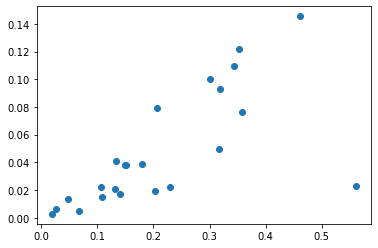

In [64]:
x=Ann_Risk
y=ind_er
plt.scatter(x,y)
plt.show()

In [65]:
assets = pd.concat([Ann_Ret,Ann_Risk,Ret_risk], axis=1)
assets.columns = ['Ann Returns', 'Ann Risk', 'Return Risk Ratio']
assets

,Ann Returns,Ann Risk,Return Risk Ratio
PFGDAAU LX Equity,0.193103,0.461536,0.418393
PFTEAAU LX Equity,0.148640,0.351670,0.422668
PFCSAAU LX Equity,0.142347,0.344130,0.413642
PFARAAU LX Equity,0.137116,0.300020,0.457024
PFBKAAU LX Equity,0.129976,0.319491,0.406822
PFGOAAU LX Equity,0.128215,0.206006,0.622384
AIBALMA AB Equity,0.156728,0.358585,0.437074
LODFUIA LX Equity,0.019267,0.047346,0.406933
CCASORI MK Equity,0.073103,0.149778,0.488074
CCASLTF MK Equity,0.071160,0.150888,0.471607


<AxesSubplot:>

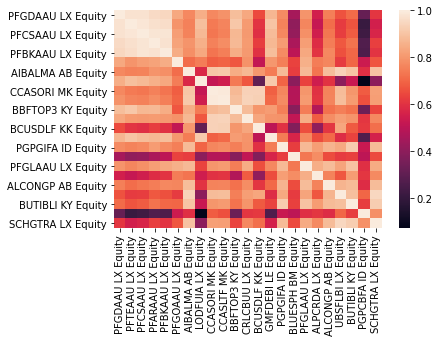

In [66]:
sb.heatmap(Ret_Corr)

In [67]:
w = [0.043]*23
#w = {'PFGDAAU LX Equity':0.043, 'PFTEAAU LX Equity':0.043, 'PFCSAAU LX Equity':0.043, 'PFARAAU LX Equity':0.043, 'PFBKAAU LX Equity':0.043, 'PFGOAAU LX Equity':0.043, 'AIBALMA AB Equity':0.043, 'LODFUIA LX Equity':0.043, 'CCASORI MK Equity':0.043, 'CCASLTF MK Equity':0.043, 'BBFTOP3 KY Equity':0.043, 'CRLCBUU LX Equity':0.043, 'BCUSDLF KK Equity':0.043, 'GMFDEBI LE Equity':0.043,'PGPGIFA ID Equity':0.043, 'BLUESPH BM Equity':0.043, 'PFGLAAU LX Equity':0.043, 'ALPCRDA LX Equity':0.043, 'ALCONGP AB Equity':0.043, 'UBSFLBI LX Equity':0.043, 'BUTIBLI KY Equity':0.043, 'PGPCBFA ID Equity':0.043, 'SCHGTRA LX Equity':0.043} 
port_var = Ret_Covar.mul(w, axis=0).mul(w, axis=1).sum().sum()
Ann_port_std = (port_var*52)**(0.5)
print (port_var)
print (port_var*52)

0.0006243666465517862
0.03246706562069288


In [68]:
Ann_port_std

0.18018619708704905

In [69]:
w = [0.043]*23
port_er = (w*Ann_Ret).sum()
port_er

0.0879848249850896

In [70]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(Data.columns)
num_portfolios = 5000

In [71]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights,Ann_Ret) 
    p_ret.append(returns)
    var = Ret_Covar.mul(weights, axis=0).mul(weights, axis=1).sum().sum() # Portfolio Variance
    sd = np.sqrt(var) #Daily standard deviation
    ann_sd = sd*np.sqrt(52) #Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [72]:
data = {'Returns':p_ret, 'Risk':p_vol}
for counter, symbol in enumerate(Data.columns.tolist()):
#print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]
portfolios = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Risk,PFGDAAU LX Equity weight,PFTEAAU LX Equity weight,PFCSAAU LX Equity weight,PFARAAU LX Equity weight,PFBKAAU LX Equity weight,PFGOAAU LX Equity weight,AIBALMA AB Equity weight,LODFUIA LX Equity weight,...,GMFDEBI LE Equity weight,PGPGIFA ID Equity weight,BLUESPH BM Equity weight,PFGLAAU LX Equity weight,ALPCRDA LX Equity weight,ALCONGP AB Equity weight,UBSFLBI LX Equity weight,BUTIBLI KY Equity weight,PGPCBFA ID Equity weight,SCHGTRA LX Equity weight
0,0.091400,0.185600,0.057262,0.069167,0.037598,0.044686,0.045686,0.069845,0.058612,0.037855,...,0.066234,0.048558,0.050616,0.059426,0.059940,0.069628,0.016636,0.005950,0.029955,0.025119
1,0.094216,0.193859,0.008251,0.028597,0.059012,0.072906,0.061915,0.046567,0.064074,0.026461,...,0.064291,0.066285,0.042098,0.025911,0.021702,0.064955,0.021169,0.063238,0.054524,0.056732
2,0.086418,0.178390,0.090417,0.011530,0.046166,0.021734,0.065565,0.056926,0.042421,0.021648,...,0.056833,0.040053,0.030635,0.041864,0.029613,0.000252,0.055588,0.032392,0.001916,0.017045
3,0.088689,0.183994,0.022968,0.019820,0.058904,0.088213,0.072053,0.024553,0.077732,0.055168,...,0.053079,0.041955,0.047673,0.014340,0.008613,0.002767,0.050192,0.030877,0.007743,0.042826
4,0.087204,0.177134,0.045798,0.023584,0.052527,0.075035,0.017249,0.077258,0.033635,0.039143,...,0.068452,0.015084,0.020919,0.042792,0.022026,0.070004,0.063550,0.052823,0.039530,0.012062


<AxesSubplot:xlabel='Risk', ylabel='Returns'>

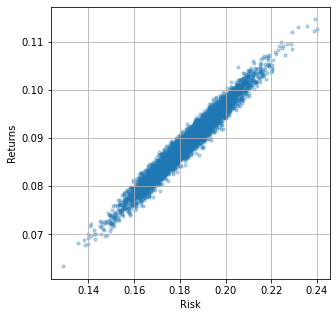

In [73]:
portfolios.plot.scatter(x='Risk', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[5,5])

In [74]:
min_vol_port = portfolios.iloc[portfolios['Risk'].idxmin()]
# idxmin() gives us the minimum value in the column specified.
min_vol_port

Returns                     0.063358
Risk                        0.128961
PFGDAAU LX Equity weight    0.019119
PFTEAAU LX Equity weight    0.035404
PFCSAAU LX Equity weight    0.000176
PFARAAU LX Equity weight    0.001851
PFBKAAU LX Equity weight    0.033069
PFGOAAU LX Equity weight    0.038375
AIBALMA AB Equity weight    0.005582
LODFUIA LX Equity weight    0.092557
CCASORI MK Equity weight    0.002801
CCASLTF MK Equity weight    0.095210
BBFTOP3 KY Equity weight    0.061738
CRLCBUU LX Equity weight    0.030624
BCUSDLF KK Equity weight    0.074608
GMFDEBI LE Equity weight    0.078019
PGPGIFA ID Equity weight    0.002579
BLUESPH BM Equity weight    0.089869
PFGLAAU LX Equity weight    0.087258
ALPCRDA LX Equity weight    0.029030
ALCONGP AB Equity weight    0.071564
UBSFLBI LX Equity weight    0.039565
BUTIBLI KY Equity weight    0.005396
PGPCBFA ID Equity weight    0.009147
SCHGTRA LX Equity weight    0.096457
Name: 839, dtype: float64

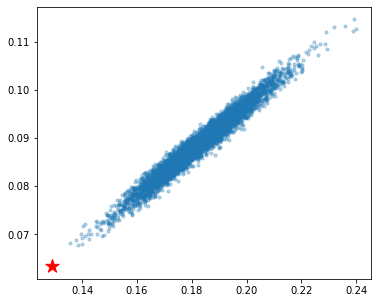

In [75]:
plt.subplots(figsize=[6,5])
plt.scatter(portfolios['Risk'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=200)

In [76]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Risk']).idxmax()]
optimal_risky_port

Returns                     0.104728
Risk                        0.205596
PFGDAAU LX Equity weight    0.069836
PFTEAAU LX Equity weight    0.048725
PFCSAAU LX Equity weight    0.010260
PFARAAU LX Equity weight    0.055378
PFBKAAU LX Equity weight    0.061403
PFGOAAU LX Equity weight    0.110205
AIBALMA AB Equity weight    0.076761
LODFUIA LX Equity weight    0.057826
CCASORI MK Equity weight    0.094864
CCASLTF MK Equity weight    0.044803
BBFTOP3 KY Equity weight    0.002899
CRLCBUU LX Equity weight    0.005801
BCUSDLF KK Equity weight    0.007255
GMFDEBI LE Equity weight    0.008683
PGPGIFA ID Equity weight    0.031030
BLUESPH BM Equity weight    0.092115
PFGLAAU LX Equity weight    0.000640
ALPCRDA LX Equity weight    0.083019
ALCONGP AB Equity weight    0.003494
UBSFLBI LX Equity weight    0.004614
BUTIBLI KY Equity weight    0.031283
PGPCBFA ID Equity weight    0.033820
SCHGTRA LX Equity weight    0.065284
Name: 1674, dtype: float64

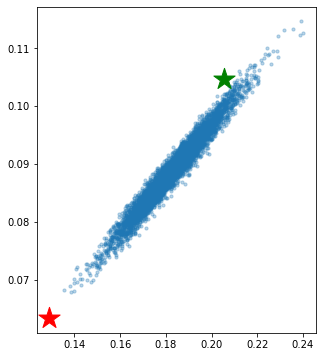

In [77]:
plt.subplots(figsize=(5, 6))
plt.scatter(portfolios['Risk'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

In [50]:
Ret_Corr.to_csv(r'Correlation Matrix .csv')